In [1]:
import os
import string
import numpy as np
import pandas as pd
import re
import nltk
import spacy
from spacy import displacy
from sklearn.model_selection import train_test_split

nlp = spacy.load('en_core_web_lg')

### Read Data

In [2]:
root_folder = r'D:\Courses\4th year\2nd term\NLP\Projects\News Group\20_newsgroups'
sub_folders = os.listdir(root_folder)
len(sub_folders)

20

In [3]:
sub_folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
def read_data(root_folder, sub_folders):

    data, labels = [], []
    
    for folder in sub_folders:
        path = os.path.join(root_folder, folder)
        samples = os.listdir(path)

        for sample in samples:
            sample_path = os.path.join(path, sample)
            text = open(sample_path, encoding='iso-8859-1')   # 'latin-1')
            data.append(text.read())
            labels.append(folder)
    
    return data, labels

In [5]:
data, labels = read_data(root_folder, sub_folders)

print(len(data))
print(len(labels))

19997
19997


In [6]:
print(labels[1200])
print('-' * 50 , end='\n\n')
print(data[1200])

comp.graphics
--------------------------------------------------

Newsgroups: comp.graphics
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!pacific.mps.ohio-state.edu!linac!uwm.edu!cs.utexas.edu!sdd.hp.com!elroy.jpl.nasa.gov!ames!haven.umd.edu!darwin.sura.net!martha.utcc.utk.edu!utkvx.utk.edu!haston
From: haston@utkvx.utk.edu (Haston, Donald Wayne)
Subject: Church related graphics
Message-ID: <16APR199317585997@utkvx.utk.edu>
News-Software: VAX/VMS VNEWS 1.41    
Keywords: Christian graphics
Sender: usenet@martha.utcc.utk.edu (USENET News System)
Organization: University of Tennessee Computing Center
Date: Fri, 16 Apr 1993 22:58:00 GMT
Lines: 13

I am looking for some good quality graphics files which are
suitable for use in church-related presentations. I prefer vector,
but anything would be helpful.

If you know of bulletin boards which have collections of this nature, or
commercial products, please inform me by email:



### Some Visualization Methods

comp.graphics


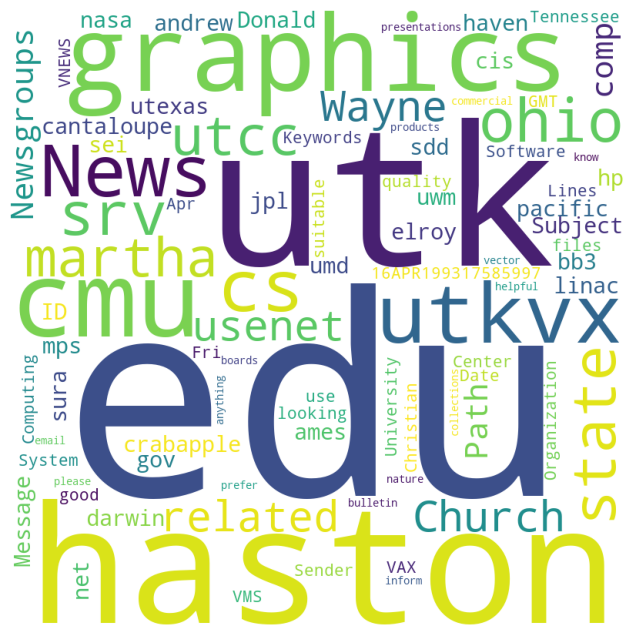

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print(labels[1200])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(data[1200])

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
print(labels[1200])
print('-' * 50 , end='\n\n')
displacy.render(nlp(data[1200]), style = "ent",jupyter = True)

comp.graphics
--------------------------------------------------



In [9]:
# displacy.render(nlp(data[1200]), style = "dep",jupyter = True, options={'distance': 80,})
# displacy.render(nlp(data[1200]), style="dep", options={"compact": True, "bg": "#09a3d5",
#                                            'distance': 80,"color": "white",
#                                            "font": "Source Sans Pro"})

### Clean Header

In [10]:
def clean_header(text):
    text = re.sub(r'(From:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(Subject:[^\n]+\n)', '', text)
    text = re.sub(r'(([\sA-Za-z0-9\-]+)?[A|a]rchive-name:[^\n]+\n)', '', text)
    text = re.sub(r'(Last-modified:[^\n]+\n)', '', text)
    text = re.sub(r'(Version:[^\n]+\n)', '', text)

    return text

### Clean Text

In [11]:
re_url = re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
re_email = re.compile('(?:[a-z0-9!#$%&\'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&\'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])')                 

def clean_text(text):        
    text = text.lower()
    text = text.strip()
    text = re.sub(re_url, '', text)
    text = re.sub(re_email, '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'(\d+)', ' ', text)
    text = re.sub(r'(\s+)', ' ', text)
    
    return text

In [12]:
# for i in range(len(data)):
#     data[i] = clean_text(clean_header(data[i]))

### Tokenization

In [13]:
tokenized_data = []
for i in range(len(data)):
    tokenized_data.append(nltk.word_tokenize(data[i]))

### Remove Stopwords

In [14]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(len(stop_words))
stop_words

179


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
filtered_data = []

for i in range(len(tokenized_data)):
    filtered_doc = [w for w in tokenized_data[i] if not w in stop_words]
    filtered_data.append(filtered_doc)

### Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

final_data = []

for i in range(len(filtered_data)):
    lemmatized_text = ' '.join(lemmatizer.lemmatize(token) for token in filtered_data[i])
    final_data.append(lemmatized_text)

### TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=5000)
vectors = vectorizer.fit_transform(final_data)

In [18]:
vectors.shape

(19997, 5000)

In [19]:
vectors.data

array([0.01069417, 0.01282035, 0.02539267, ..., 0.03468619, 0.03468619,
       0.03806945])

### Split Data

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

In [21]:
encoded_labels

array([ 0,  0,  0, ..., 19, 19, 19], dtype=int64)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(vectors, encoded_labels, test_size=0.3, stratify=labels, shuffle=True)

In [23]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(13997, 5000)
(6000, 5000)
(13997,)
(6000,)


### RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = rf.predict(X_val)
print(y_pred[:24])
print(y_val[:24])

[ 3 19  2 11  0 13 12  9 10  6 19 19  4  3 10  7  4  0 10  4 17 11  3 10]
[ 3 19  2 11  0 13 12  9 10  6  0 19  4  3 10  7  4 19 10  4 17 11  3  9]


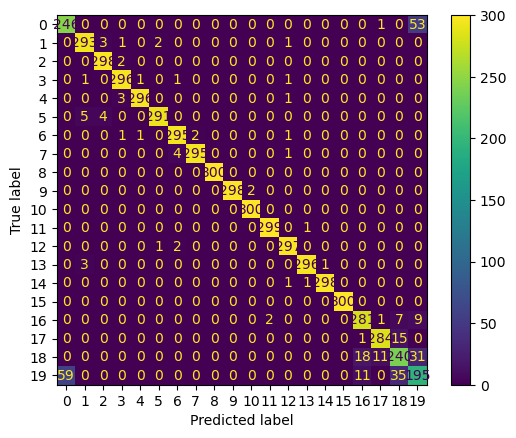

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [27]:
print(f"Train Accuracy: {rf.score(X_train, y_train)*100:.3f}%")
print(f"Test Accuracy: {rf.score(X_val, y_val)*100:.3f}%")

Train Accuracy: 98.071%
Test Accuracy: 94.967%


### MLP

In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [29]:
y_pred = mlp.predict(X_val)

print(y_pred[:24])
print(y_val[:24])

[ 3  0  2 11  0 13 12  9 10  6 19 19  4  3 10  7  4  0 10  4 17 11  3  9]
[ 3 19  2 11  0 13 12  9 10  6  0 19  4  3 10  7  4 19 10  4 17 11  3  9]


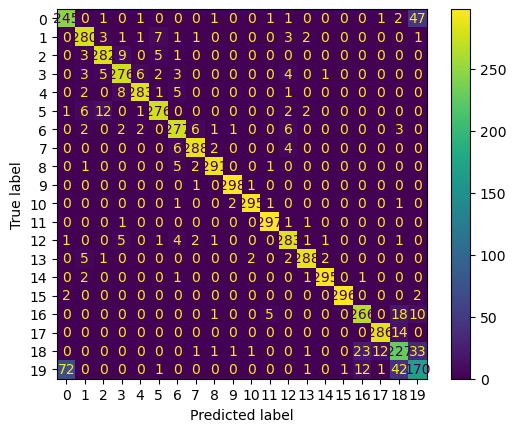

In [30]:
cm = confusion_matrix(y_val,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [31]:
print(f"Train Accuracy: {mlp.score(X_train, y_train)*100:.3f}%")
print(f"Test Accuracy: {mlp.score(X_val, y_val)*100:.3f}%")

Train Accuracy: 98.064%
Test Accuracy: 91.650%
